<h1><center>Home Credit Risk Prediction</center></h1>
<center>December 2024</center>
<center>Celine Ng</center>

# Table of Contents

1. Project Introduction
    1. Notebook Preparation
    1. Data loading
1. Main Data Preparation
    1. Data cleaning
    1. Dataframes and keys
    1. Train Test Split
    1. Aggregation
1. Initial Data Cleaning
    1. Datatypes
    1. Missing values
1. EDA
    1. Original Tables Distribution
    1. Correlation
    1. Statistical Inference
    1. Distribution
1. Data Preprocessing
1. Feature Selection
    1. All features included
    1. Mutual Information
    1. PCA
1. Models
    1. Baseline model
    1. Basic model
    1. Hyperparameter Tuning
    1. Test Data
    1. Final Model
    1. Deployment
    1. Model Interpretation
1. Improvements

In [1]:
from matplotlib.pyplot import xlabel
%%capture
%pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import os

from utils.eda import *

from sklearn.compose import make_column_selector as selector

# 3. Initial Data Cleaning

Load the aggregated table for training and name it 'data' for simplicity

In [3]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
folder = os.path.join(project_root, "aggregated_data")
data_path = os.path.join(folder, "data_merged.pkl")
data = pd.read_pickle(data_path)

display(data.head())
data_shape = data.shape
print(f"Number of rows on train data_csv: {data_shape[0]}\nNumber of "
      f"columns on train data_csv: {data_shape[1]}")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,pos_cash_SK_DPD_DEF_max_sum,pos_cash_SK_DPD_DEF_max_min,pos_cash_SK_DPD_DEF_max_max,pos_cash_SK_DPD_DEF_max_count,pos_cash_SK_DPD_DEF_count_mean,pos_cash_SK_DPD_DEF_count_sum,pos_cash_SK_DPD_DEF_count_min,pos_cash_SK_DPD_DEF_count_max,pos_cash_SK_DPD_DEF_count_count,SK_ID_PREV_count
0,310536,0,Cash loans,F,N,N,2,90000.0,227520.0,13189.5,...,0.0,0.0,0.0,4.0,8.50,34.0,7.0,13.0,4.0,5.0
1,365516,0,Cash loans,M,Y,Y,0,90000.0,161730.0,13095.0,...,0.0,0.0,0.0,4.0,7.75,31.0,5.0,12.0,4.0,6.0
2,242055,1,Cash loans,M,N,Y,0,135000.0,728847.0,26307.0,...,0.0,0.0,0.0,1.0,5.00,5.0,5.0,5.0,1.0,1.0
3,454894,1,Cash loans,M,N,N,0,135000.0,474183.0,34636.5,...,0.0,0.0,0.0,5.0,16.80,84.0,5.0,49.0,5.0,8.0
4,448321,0,Cash loans,F,N,Y,0,180000.0,254700.0,27558.0,...,0.0,0.0,0.0,1.0,12.00,12.0,12.0,12.0,1.0,2.0


Number of rows on train data_csv: 246008
Number of columns on train data_csv: 1251


## 3.1. Data Types

In [4]:
data.dtypes

SK_ID_CURR                           int64
TARGET                               int64
NAME_CONTRACT_TYPE                  object
CODE_GENDER                         object
FLAG_OWN_CAR                        object
                                    ...   
pos_cash_SK_DPD_DEF_count_sum      float64
pos_cash_SK_DPD_DEF_count_min      float64
pos_cash_SK_DPD_DEF_count_max      float64
pos_cash_SK_DPD_DEF_count_count    float64
SK_ID_PREV_count                   float64
Length: 1251, dtype: object

There are still some object columns remaining from the main table itself,
originally called *application*.

In [5]:
columns = data.select_dtypes(include='object').columns.tolist()
data[columns]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,F,N,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 2,reg oper account,block of flats,Panel,No
1,Cash loans,M,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Drivers,TUESDAY,Other,NaN,NaN,NaN,NaN
2,Cash loans,M,N,Y,"Spouse, partner",Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper spec account,block of flats,Panel,No
3,Cash loans,M,N,N,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,NaN,block of flats,Block,No
4,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,Accountants,MONDAY,Restaurant,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,Revolving loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Sales staff,MONDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
246004,Cash loans,F,N,N,Unaccompanied,State servant,Secondary / secondary special,Single / not married,House / apartment,Secretaries,MONDAY,Medicine,reg oper account,block of flats,Panel,No
246005,Cash loans,F,N,N,Unaccompanied,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,NaN,SUNDAY,XNA,reg oper account,block of flats,Mixed,No
246006,Cash loans,F,N,Y,Children,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,XNA,NaN,NaN,NaN,NaN


In [6]:
for column in columns:
    unique_values = data[column].unique()
    display(unique_values)

array(['Cash loans', 'Revolving loans'], dtype=object)

array(['F', 'M', 'XNA'], dtype=object)

array(['N', 'Y'], dtype=object)

array(['N', 'Y'], dtype=object)

array(['Unaccompanied', 'Spouse, partner', 'Family', 'Other_B', nan,
       'Children', 'Group of people', 'Other_A'], dtype=object)

array(['Commercial associate', 'Working', 'Pensioner', 'State servant',
       'Businessman', 'Unemployed', 'Student', 'Maternity leave'],
      dtype=object)

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow', 'Unknown'], dtype=object)

array(['House / apartment', 'Municipal apartment', 'With parents',
       'Rented apartment', 'Co-op apartment', 'Office apartment'],
      dtype=object)

array(['Laborers', 'Drivers', 'Accountants', nan, 'Sales staff',
       'High skill tech staff', 'Medicine staff', 'Core staff',
       'Security staff', 'Managers', 'Waiters/barmen staff',
       'Private service staff', 'Cooking staff', 'Low-skill Laborers',
       'IT staff', 'Realty agents', 'HR staff', 'Secretaries',
       'Cleaning staff'], dtype=object)

array(['WEDNESDAY', 'TUESDAY', 'MONDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY',
       'SUNDAY'], dtype=object)

array(['Business Entity Type 2', 'Other', 'Business Entity Type 3',
       'Restaurant', 'XNA', 'Transport: type 3', 'Self-employed',
       'Agriculture', 'Government', 'Industry: type 3', 'Medicine',
       'University', 'School', 'Transport: type 4', 'Security',
       'Electricity', 'Trade: type 2', 'Transport: type 2',
       'Industry: type 9', 'Construction', 'Industry: type 11',
       'Legal Services', 'Military', 'Kindergarten', 'Industry: type 12',
       'Business Entity Type 1', 'Police', 'Housing', 'Bank',
       'Industry: type 7', 'Telecom', 'Industry: type 2', 'Trade: type 7',
       'Security Ministries', 'Trade: type 3', 'Trade: type 6', 'Postal',
       'Services', 'Advertising', 'Hotel', 'Industry: type 4',
       'Insurance', 'Industry: type 1', 'Industry: type 5', 'Emergency',
       'Realtor', 'Mobile', 'Industry: type 10', 'Culture', 'Cleaning',
       'Trade: type 1', 'Industry: type 6', 'Trade: type 4',
       'Transport: type 1', 'Religion', 'Industry: type 

array(['reg oper account', nan, 'reg oper spec account',
       'org spec account', 'not specified'], dtype=object)

array(['block of flats', nan, 'specific housing', 'terraced house'],
      dtype=object)

array(['Panel', nan, 'Block', 'Stone, brick', 'Mixed', 'Others', 'Wooden',
       'Monolithic'], dtype=object)

array(['No', nan, 'Yes'], dtype=object)

The columns contain several different types of information. <br>
1. Columns Suitable for One-Hot Encoding:
    1. 'F', 'M', 'XNA': Gender.
    2. 'WEDNESDAY', 'TUESDAY', ..., 'SUNDAY': Days of the week.
    3. 'House / apartment', 'Municipal apartment', ...: Housing type.
    4. 'Panel', 'Block', 'Stone, brick', ...: Building type.
    5. 'block of flats', ..., 'terraced house': Housing type.
1. Columns Suitable for Ordinal Encoding:
    1. 'Higher education', 'Secondary / secondary special', ...: Education level.
    2. 'Married', 'Single / not married', ...: Marital status (an order
    like "Single < Married < Widow").
1. Columns Suitable for Frequency or Target Encoding:
    1. 'Laborers', 'Drivers', ..., 'Cleaning staff': Occupation (many unique
values).
    2. 'Business Entity Type 2', ..., 'Industry: type 8': Industry or business
type (large number of categories).
1. Columns Suitable for Binary Encoding:
    1. 'N', 'Y'
    2. 'No', 'Yes'

## 3.2. Missing Values

In [7]:
missing_df = missing_values(data).sort_values(by=['Percentage Missing'],
                                     ascending=False)
missing_df

,Missing Values,Percentage Missing,Datatype
previous_application_RATE_INTEREST_PRIVILEGED_max,242323,98.5,float64
previous_application_RATE_INTEREST_PRIVILEGED_min,242323,98.5,float64
previous_application_RATE_INTEREST_PRIVILEGED_mean,242323,98.5,float64
previous_application_RATE_INTEREST_PRIMARY_mean,242323,98.5,float64
previous_application_RATE_INTEREST_PRIMARY_max,242323,98.5,float64
...,...,...,...
REG_CITY_NOT_WORK_CITY,0,0.0,int64
REG_CITY_NOT_LIVE_CITY,0,0.0,int64
LIVE_REGION_NOT_WORK_REGION,0,0.0,int64
REG_REGION_NOT_WORK_REGION,0,0.0,int64


Now having all the columns combined in one dataframe, it is clearer to
decide what to do with each column. Our data has missing values % ranging
from 98.5% to 0%. Consider the categorization below: <br>
1. Low Missing Values (<20-30%)
2. Moderate Missing Values (30-70%)
3. High Missing Values (>70-80%)<br>

*Important: Aggregations functions will ignore NaN values during groupby.
However, columns aggregated with sum or count will replace NaN with 0 for
entirely missing groups.*

In [8]:
folder = os.path.join(project_root, "aggregated_data")
data_path = os.path.join(folder, "data_merged.pkl")
data = pd.read_pickle(data_path)

<Axes: xlabel='Count', ylabel='Percentage Missing'>

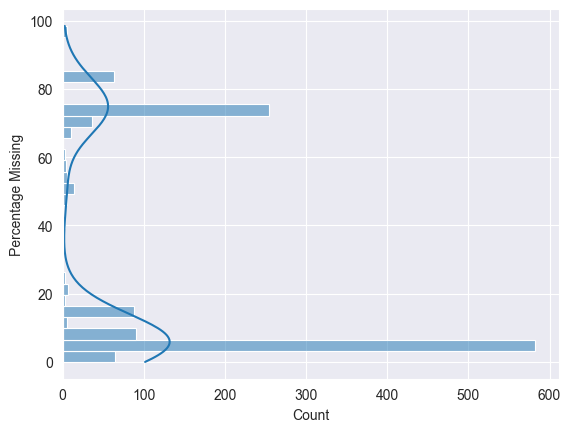

In [9]:
sns.histplot(data=missing_df, y='Percentage Missing', kde=True, bins=30)

Looking into the distribution of columns' percentage of missing values,
columns can be put into 2 groups. <br>
As expected most columns with high missing values are coming from the
bureau_balance and credit_card_balance tables, as these had the least
SK_ID_CURR correspondences. Also, a few columns from previous_application
and bureau.<br>
 1. In train dataset around 5.36% of SK_ID_CURR do not correspond to any
 SK_ID_PREV, and 14.33% for SK_ID_BUREAU
 2. Similar as reason above, not all SK_ID_PREV and SK_ID_BUREAU are included
 in complementary tables such as credit_card_balance and bureau_balance. For
  example, credit card train dataset only corresponds to 29.07% of
  SK_ID_CURR. Meaning ±70% of SK_ID_CURR, do not have credit card
  information.<br>

To handle missing values, we could leave it as is, impute, drop the column,
or treat it as a separate value. <br>
To apply proper treatment, a better understanding of why are they missing in
 the first place is needed.
 - Is there any pattern to clients with and without previous information?
  - Is there a pattern to the specific which information is missing?

# 4. EDA

## 4.1. Original Tables Distribution
Objective: To avoid data leakage, data distribution is only visualized now
after splits.

In [10]:
folder = os.path.join(project_root, "data_train_test_split")
folder_2 = os.path.join(folder, "train_split")

data_train_path = os.path.join(folder_2, "data_train.pkl")
bureau_train_path = os.path.join(folder_2, "bureau_train.pkl")
bureau_balance_train_path = os.path.join(folder_2, "bureau_balance_train.pkl")
previous_application_train_path = os.path.join(folder_2, "previous_application_train.pkl")
credit_card_balance_train_path = os.path.join(
    folder_2, "credit_card_balance_train.pkl")
installments_payments_train_path = os.path.join(
    folder_2, "installments_payments_train.pkl")
POS_CASH_balance_train_path = os.path.join(
    folder_2, "POS_CASH_balance_train.pkl")

data_train = pd.read_pickle(data_train_path)
bureau_train = pd.read_pickle(bureau_train_path)
bureau_balance_train_path = pd.read_pickle(bureau_balance_train_path)
previous_application_train = pd.read_pickle(previous_application_train_path)
credit_card_balance_train = pd.read_pickle(credit_card_balance_train_path)
installments_payments_train = pd.read_pickle(installments_payments_train_path)
POS_CASH_balance_train = pd.read_pickle(POS_CASH_balance_train_path)

In [11]:
categorical_columns_selector = selector(dtype_exclude='number')
numerical_columns_selector = selector(dtype_include='number')

data_categorical_columns = categorical_columns_selector(data_train)
data_numerical_columns = numerical_columns_selector(data_train)

binary_columns = [
    col for col in data_train.columns
    if data_train[col].nunique() == 2 and data_train[col].dtype in ['int64', 'float64']
]

numerical_columns = [
    col for col in data_numerical_columns
    if col not in binary_columns
]

In [12]:
data_train[numerical_columns].describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,246008.000000,246008.000000,2.460080e+05,2.460080e+05,245998.000000,2.457870e+05,246008.000000,246008.000000,246008.000000,246008.000000,...,245197.000000,245197.000000,245197.000000,246007.000000,212764.000000,212764.000000,212764.000000,212764.000000,212764.000000,212764.000000
mean,278335.354724,0.416409,1.688532e+05,5.993382e+05,27108.089708,5.386530e+05,0.020858,-16029.515882,63581.163637,-4989.585005,...,0.143481,1.405184,0.099577,-962.665587,0.006289,0.006895,0.034245,0.267103,0.264166,1.897469
std,102797.868259,0.719500,2.589606e+05,4.027258e+05,14520.904087,3.695950e+05,0.013835,4362.869037,141081.696923,3524.557231,...,0.447988,2.398144,0.361737,826.782574,0.082939,0.110734,0.205219,0.917724,0.612447,1.868143
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189239.750000,0.000000,1.125000e+05,2.700000e+05,16510.500000,2.385000e+05,0.010006,-19673.000000,-2762.000000,-7480.000000,...,0.000000,0.000000,0.000000,-1569.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278392.000000,0.000000,1.476000e+05,5.147775e+05,24903.000000,4.500000e+05,0.018850,-15744.000000,-1215.000000,-4505.000000,...,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367291.750000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12401.000000,-291.000000,-2015.000000,...,0.000000,2.000000,0.000000,-273.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,19.000000,25.000000


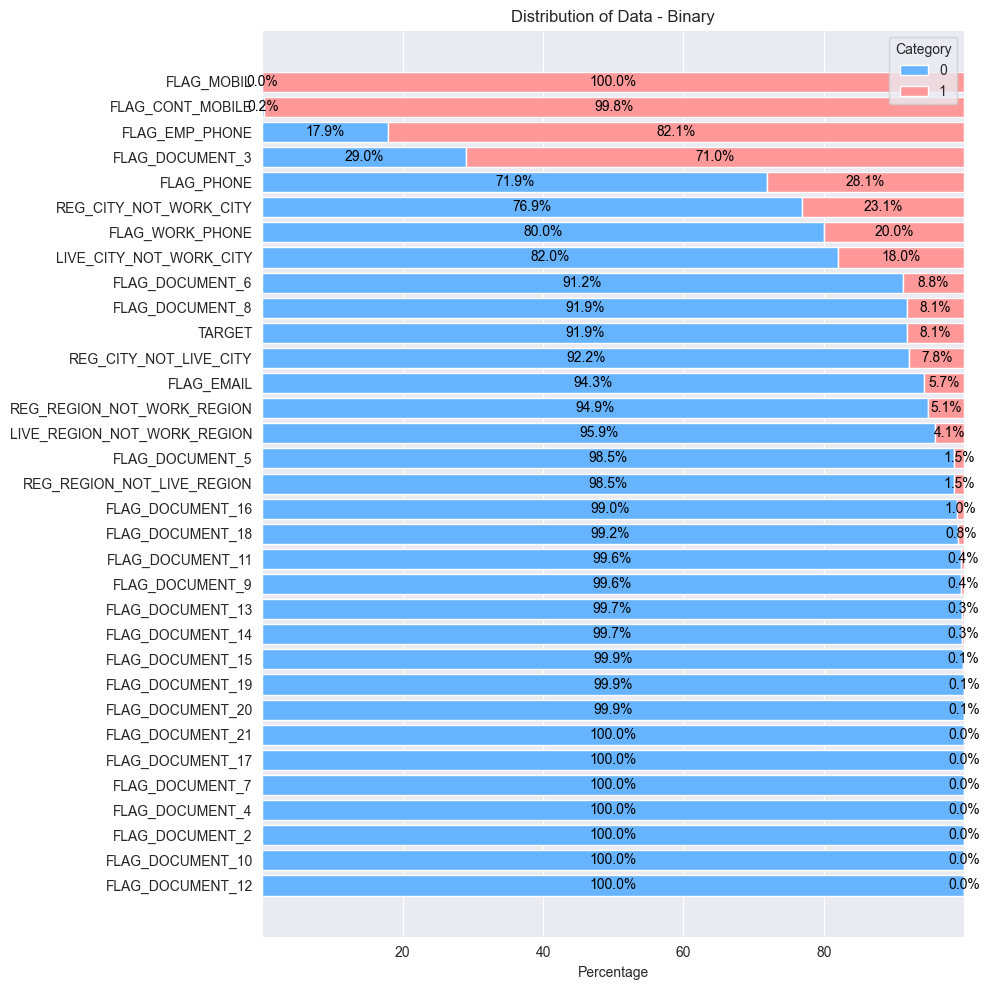

In [17]:
horizontal_binary_distribution(data=data_train,
                                        columns=binary_columns,
                                        title='Distribution of Data - Binary')

Target variable shows 8.1% of clients from our data has payment
difficulties, 91.9% without.

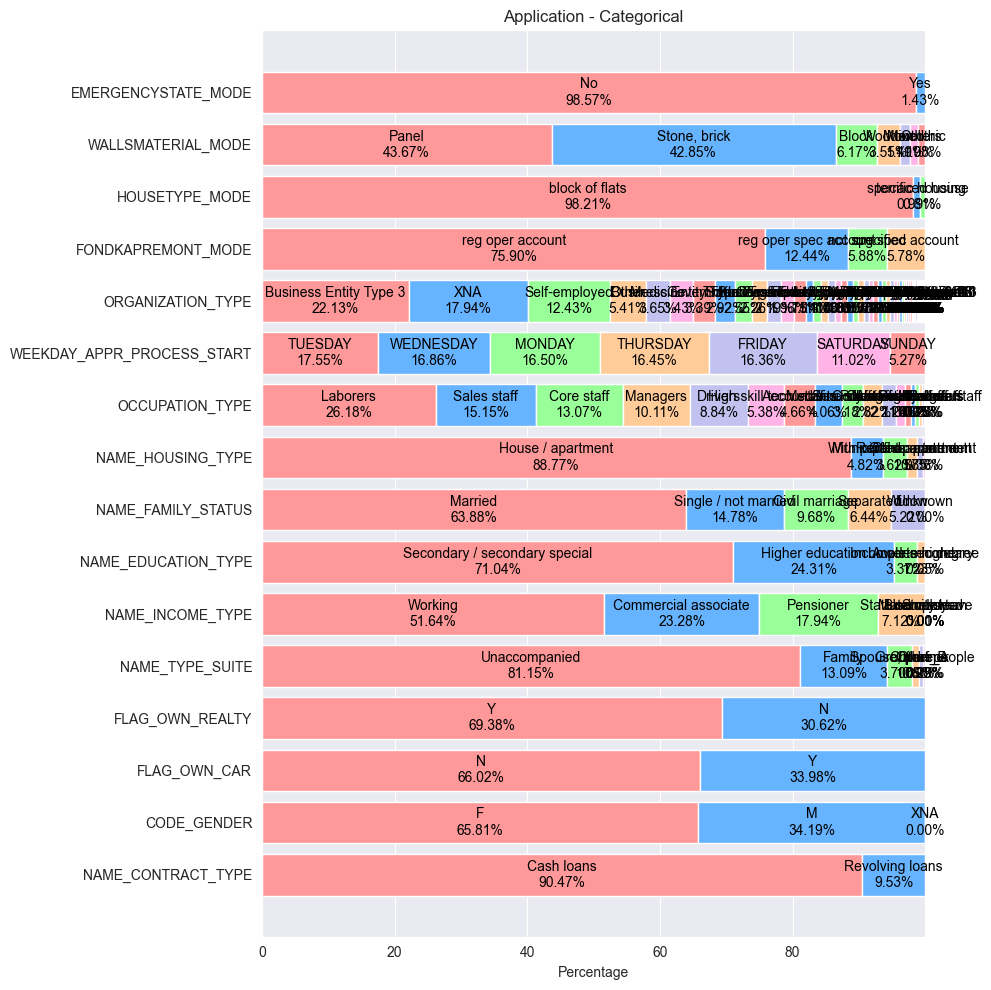

In [14]:
stacked_horizontal_feature_distribution(data=data_train,
                                        columns=data_categorical_columns,
                                        title='Application - Categorical')

In [22]:
len(numerical_columns)/2

36.5

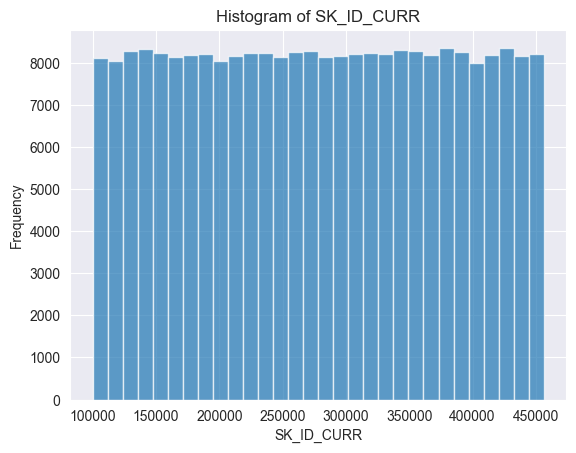

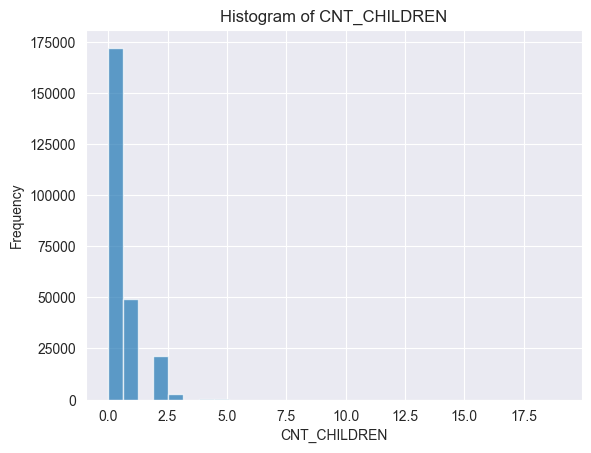

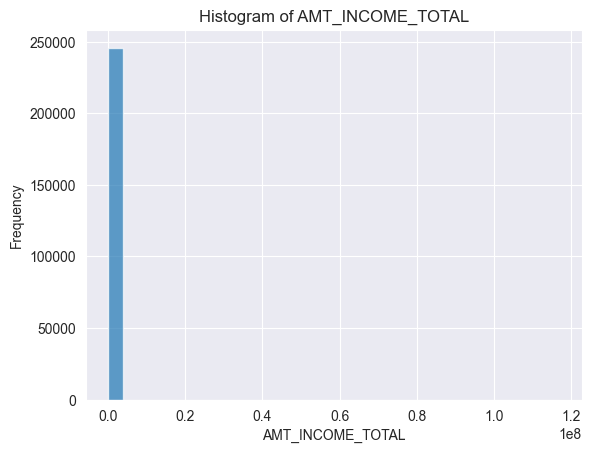

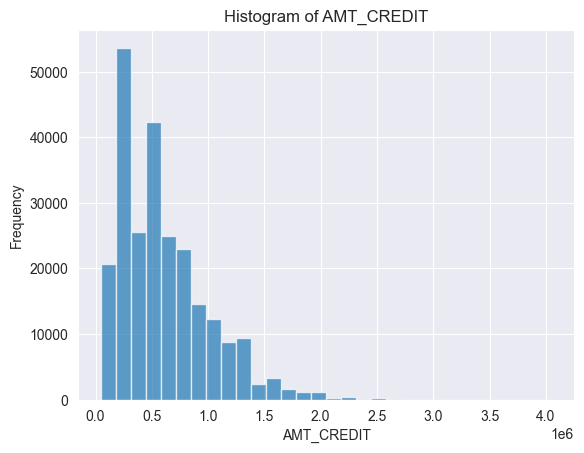

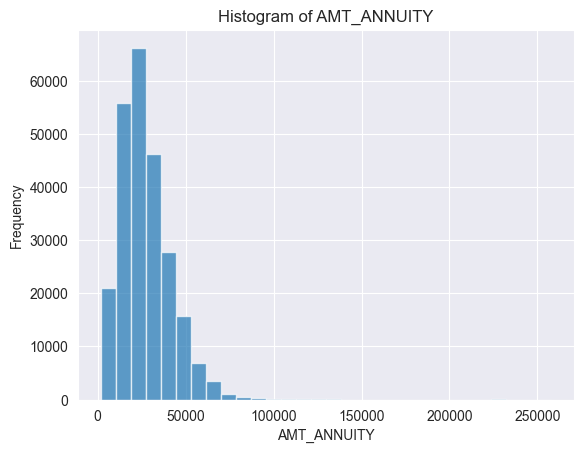

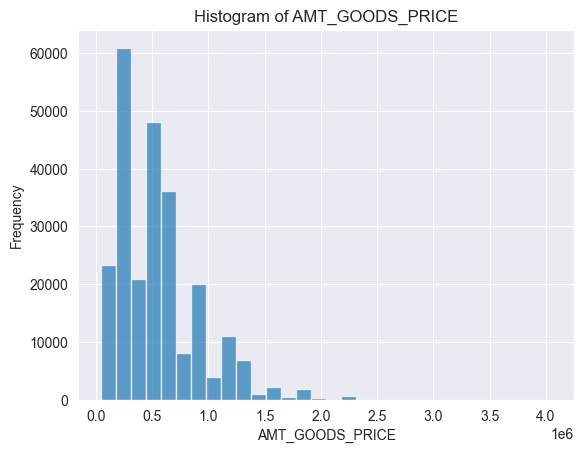

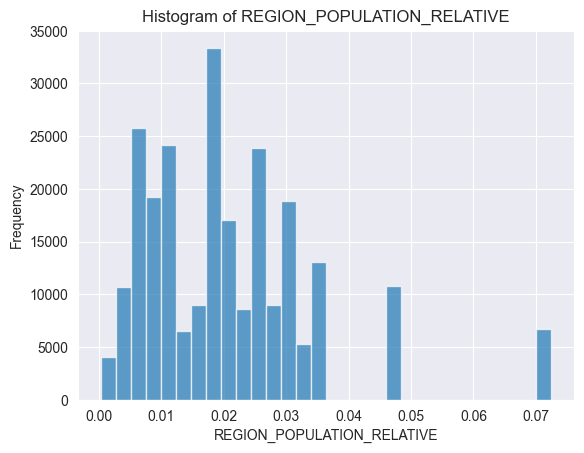

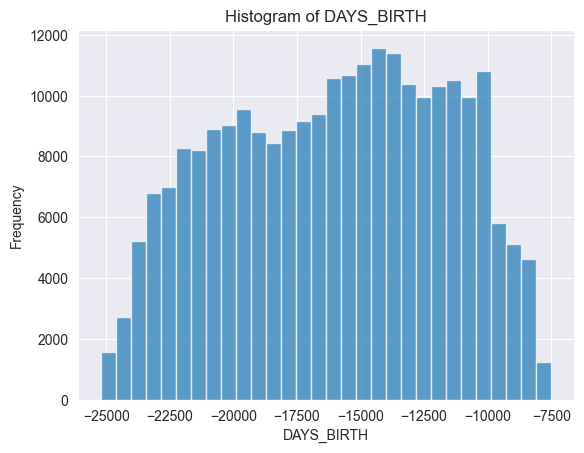

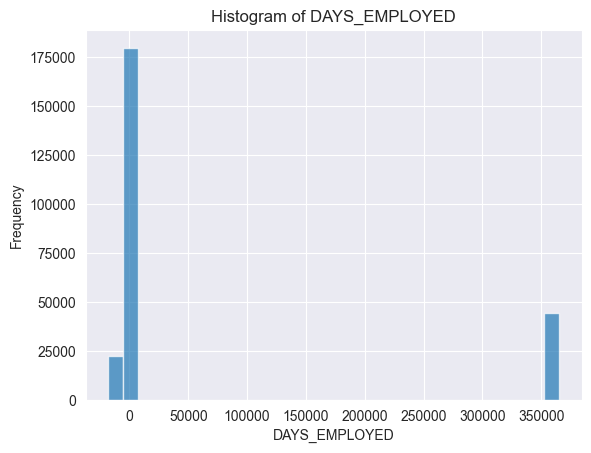

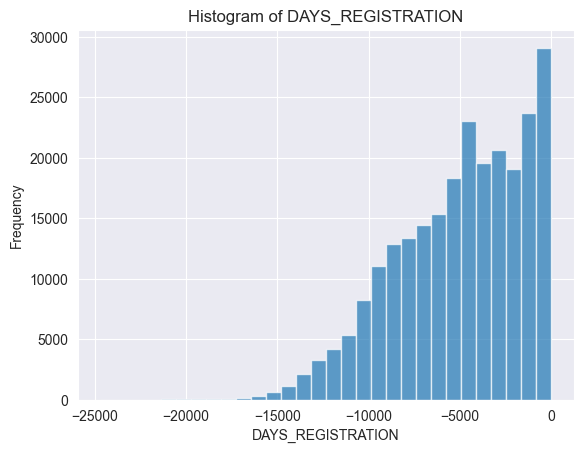

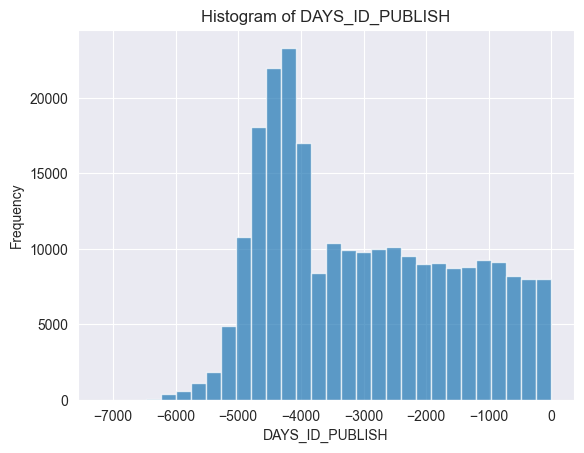

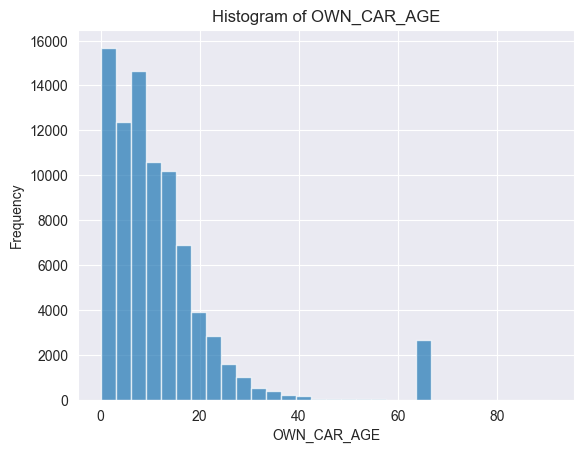

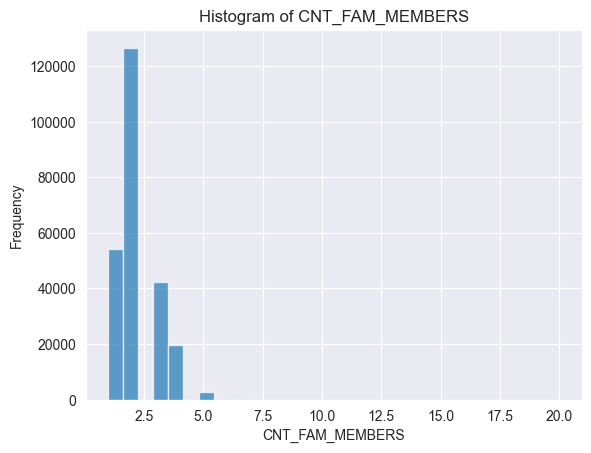

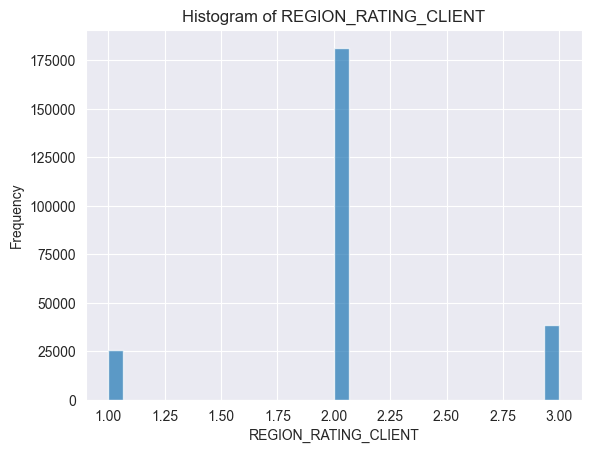

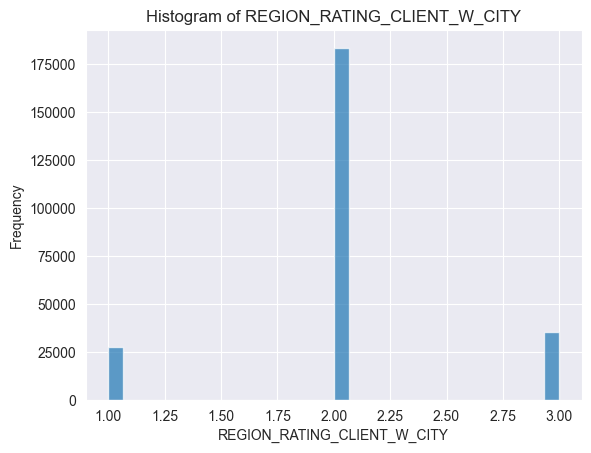

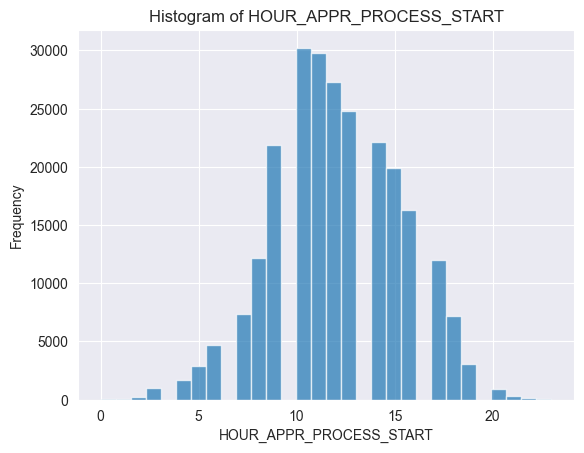

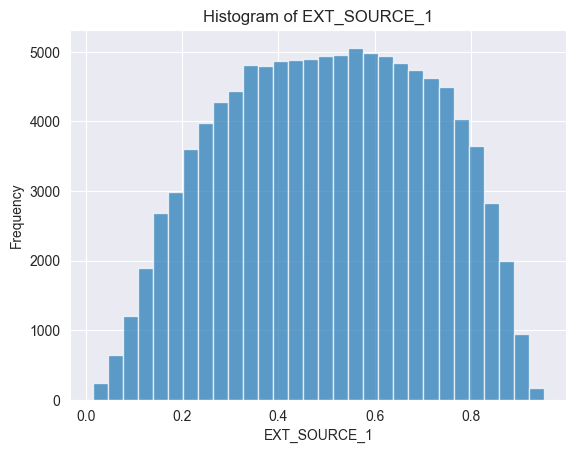

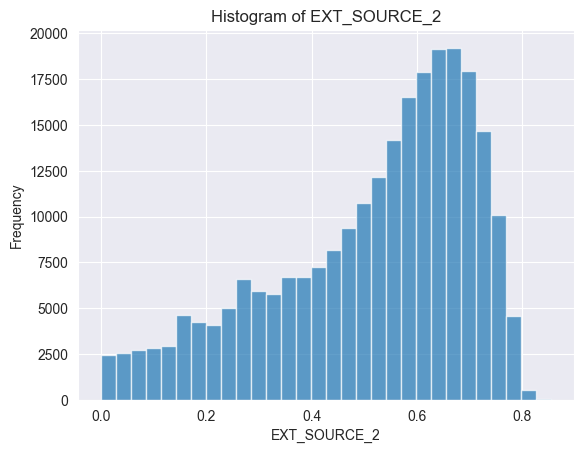

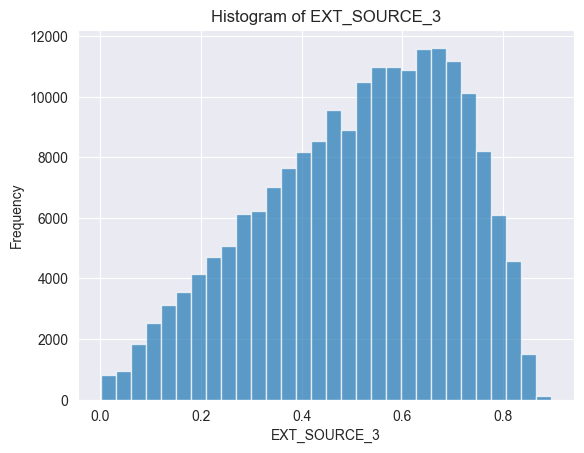

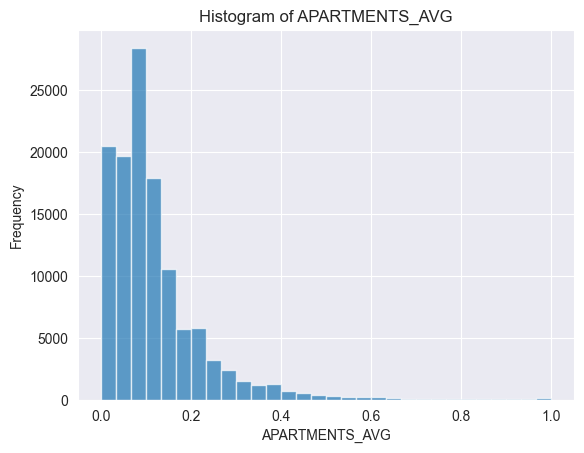

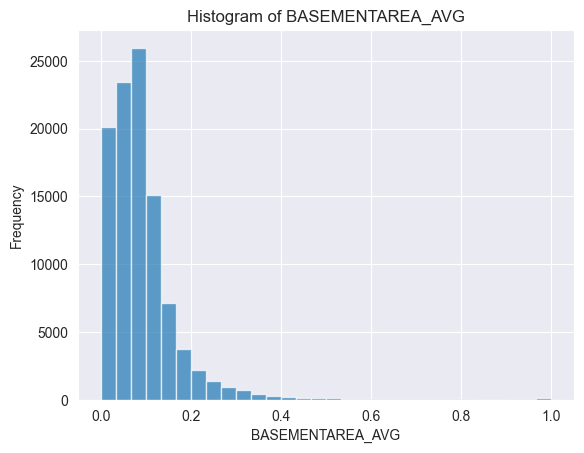

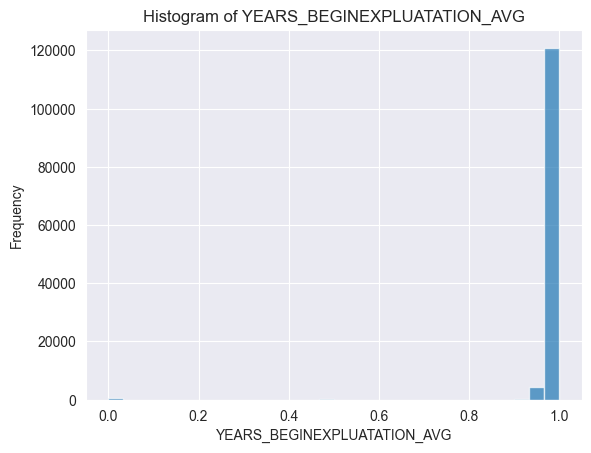

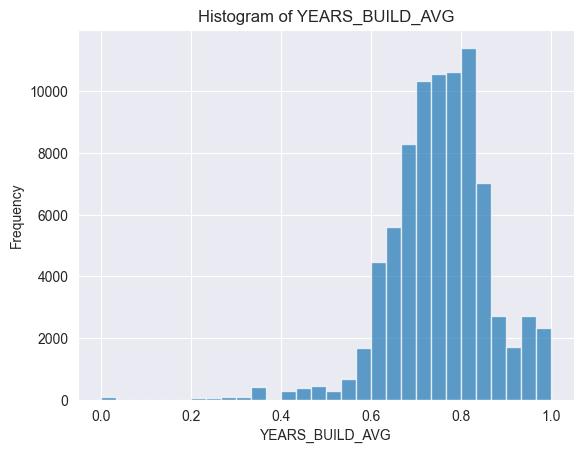

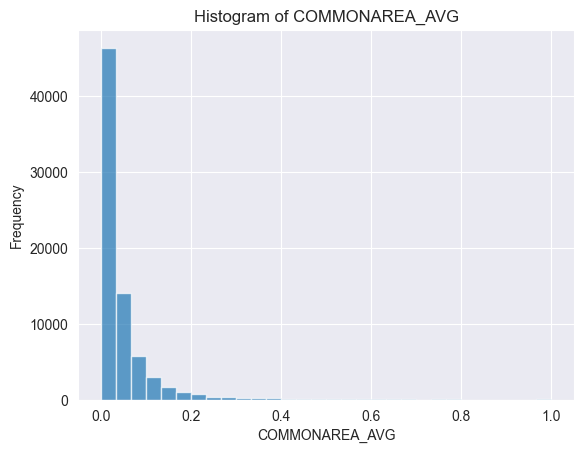

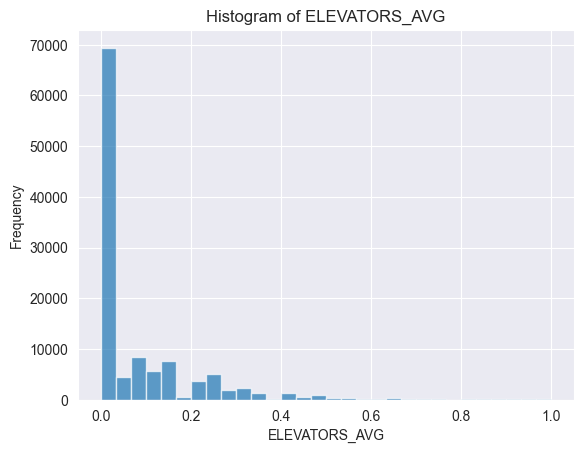

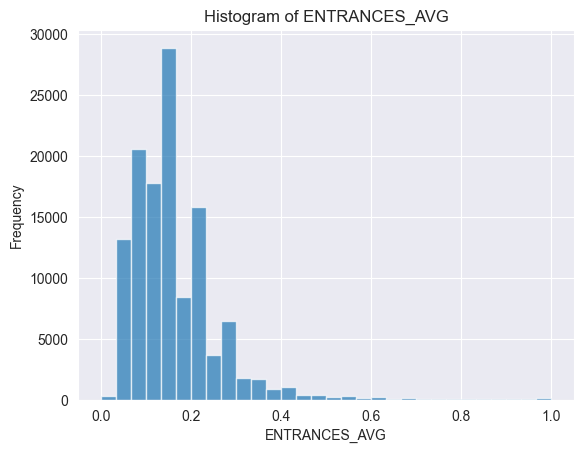

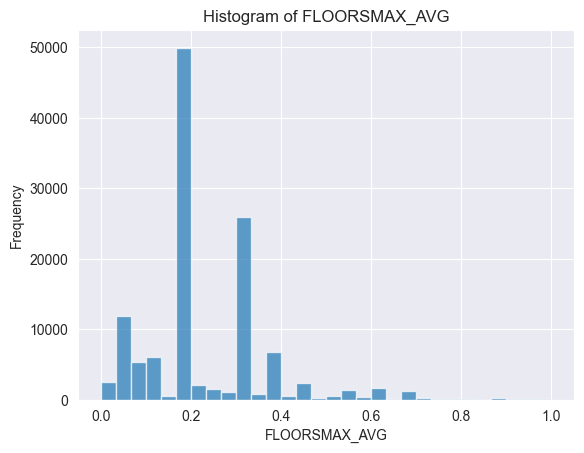

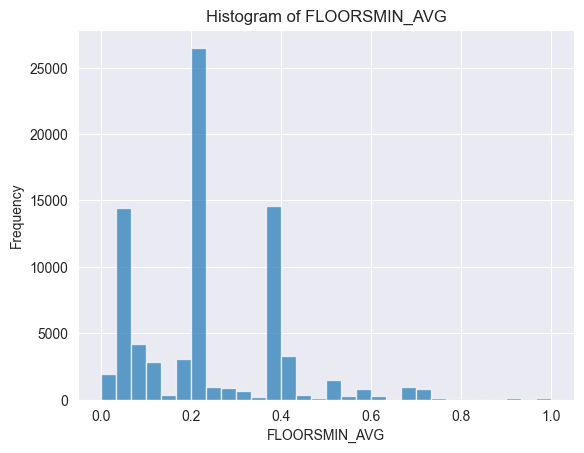

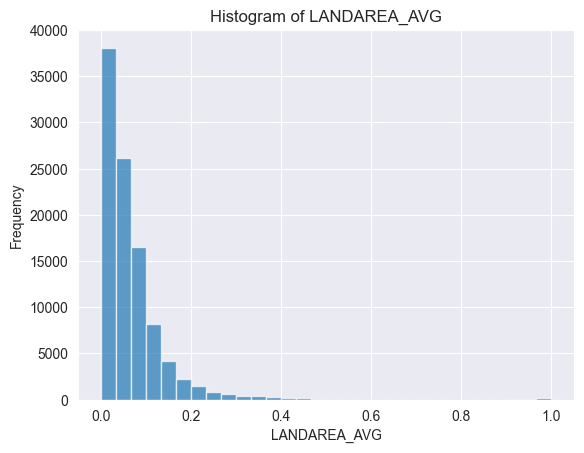

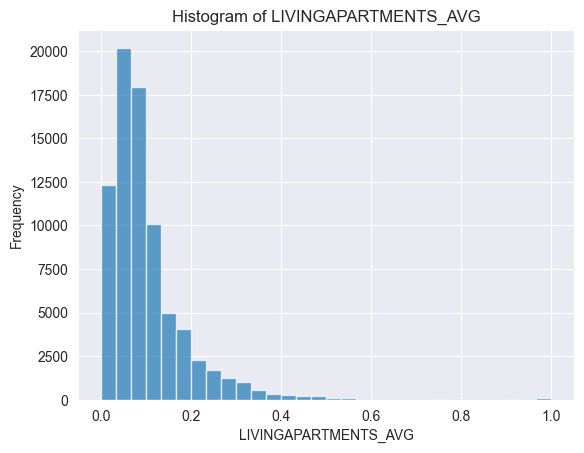

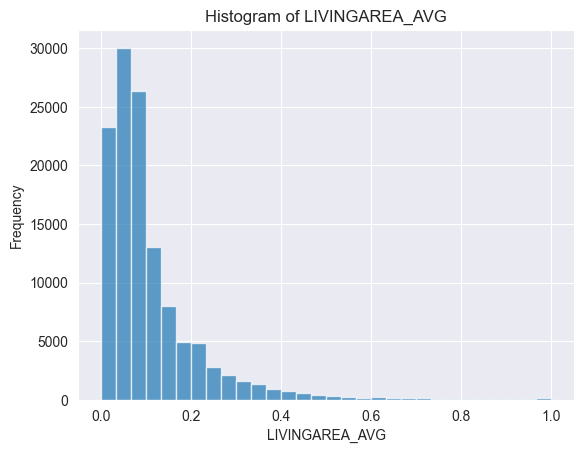

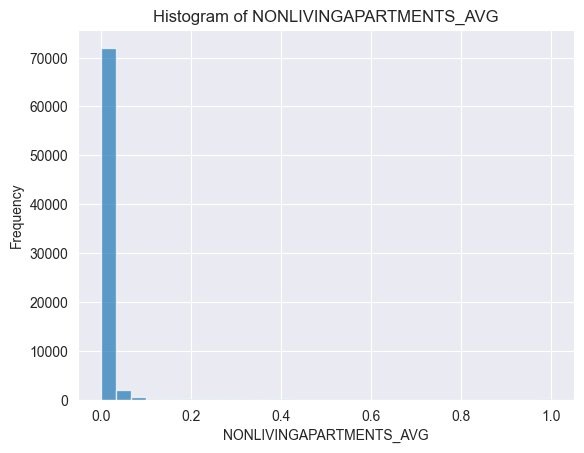

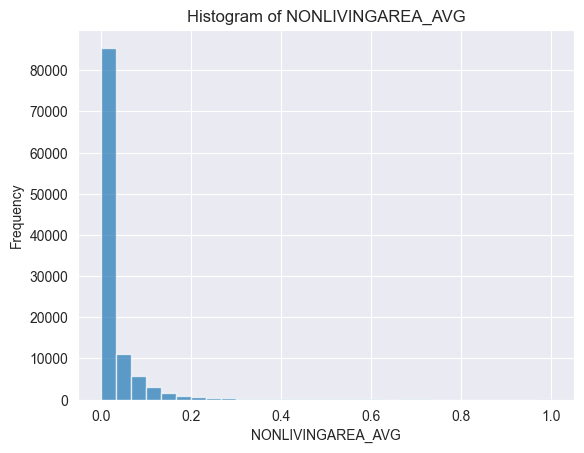

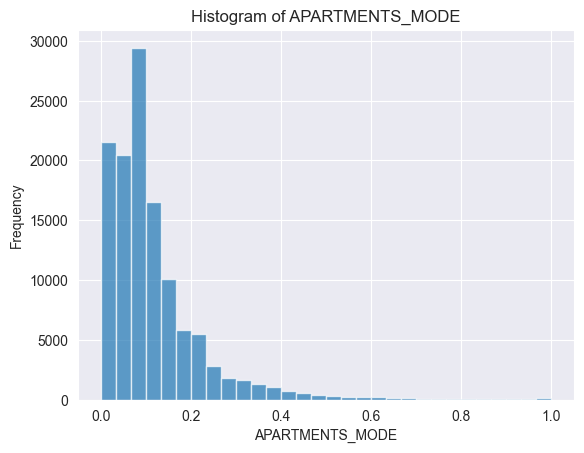

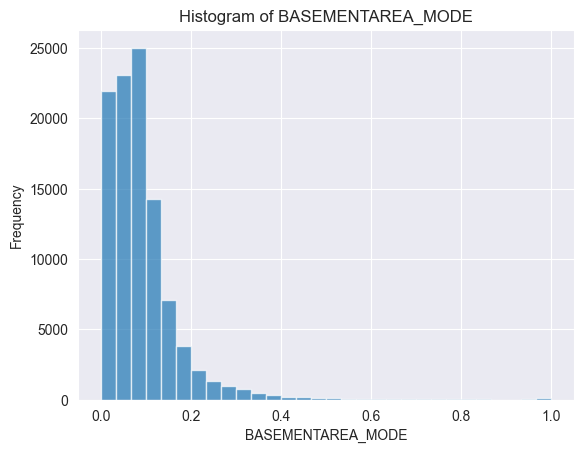

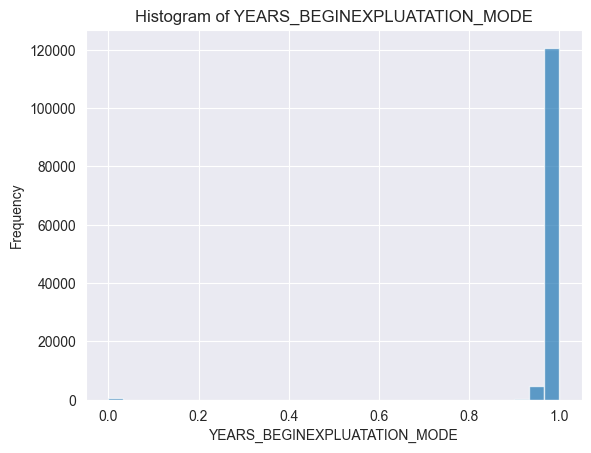

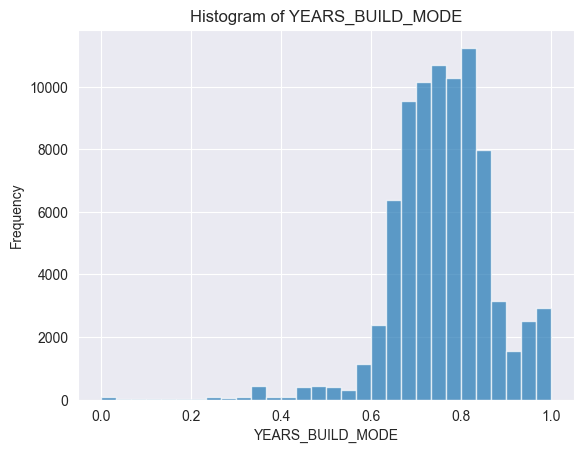

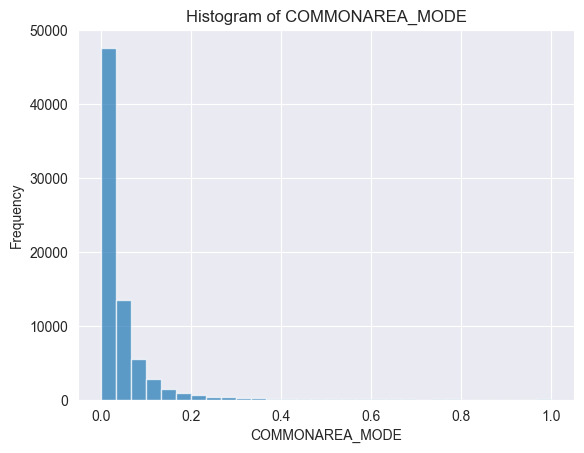

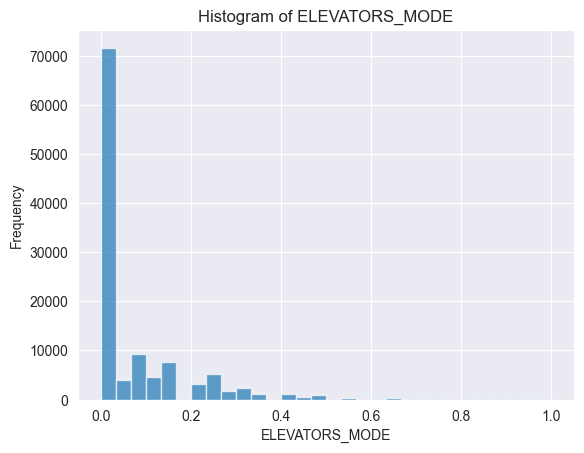

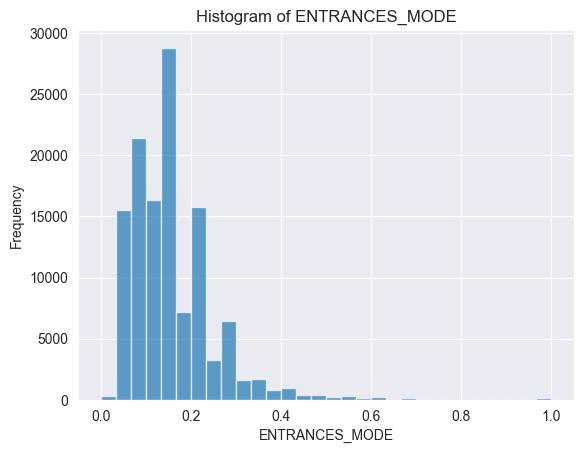

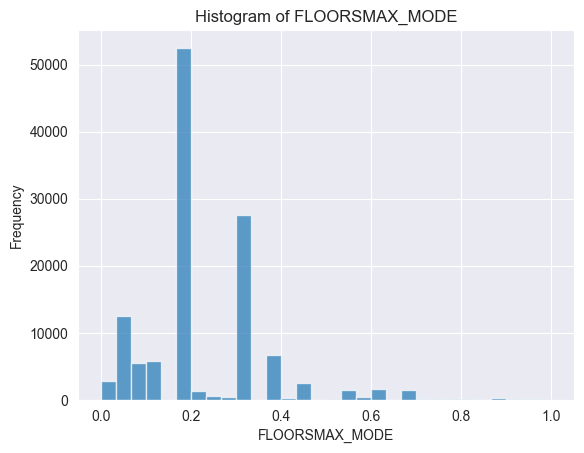

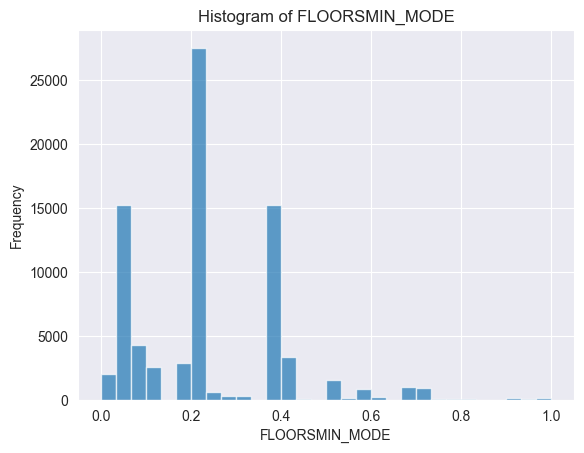

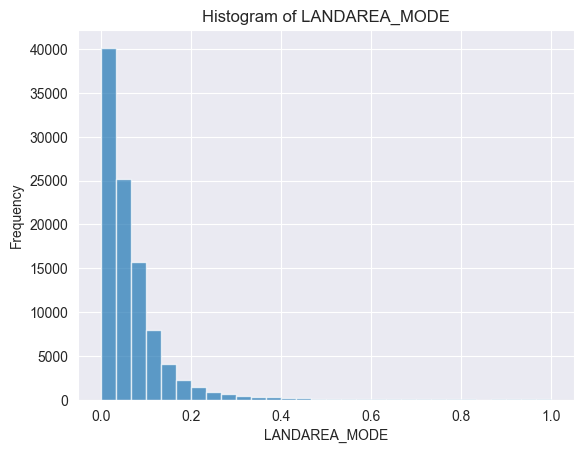

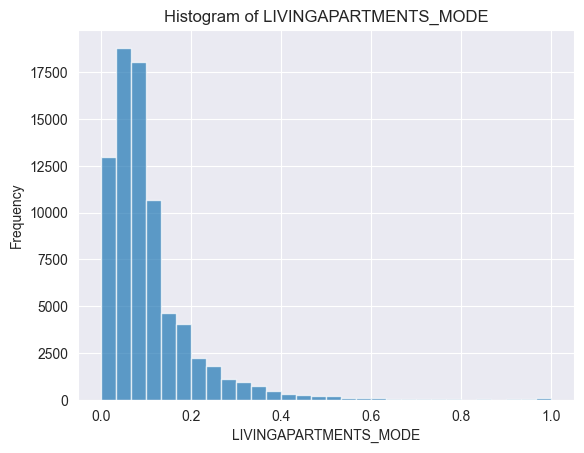

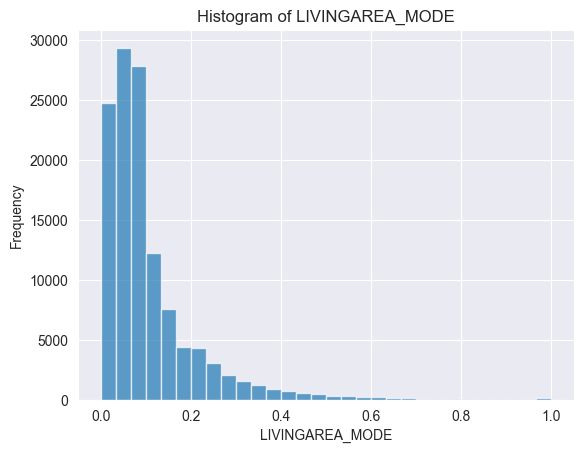

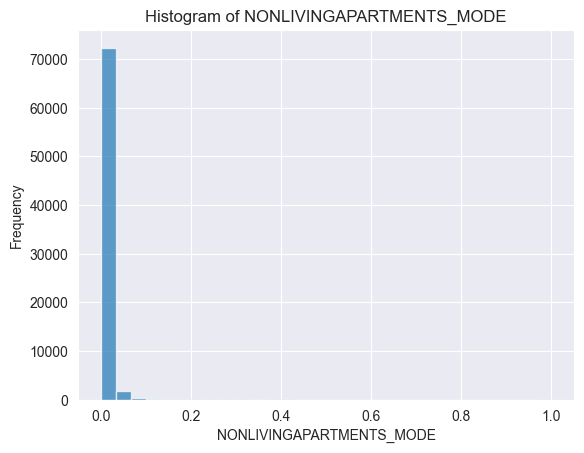

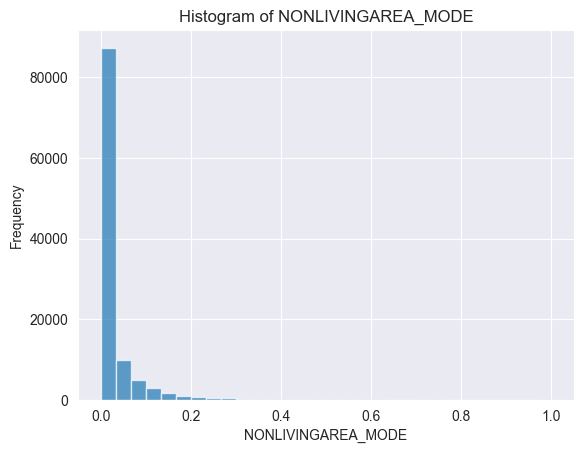

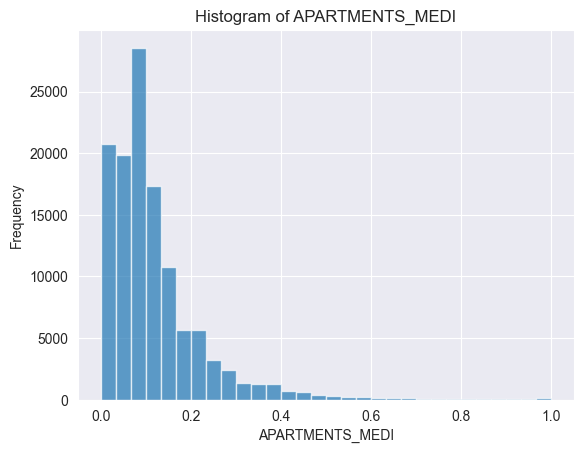

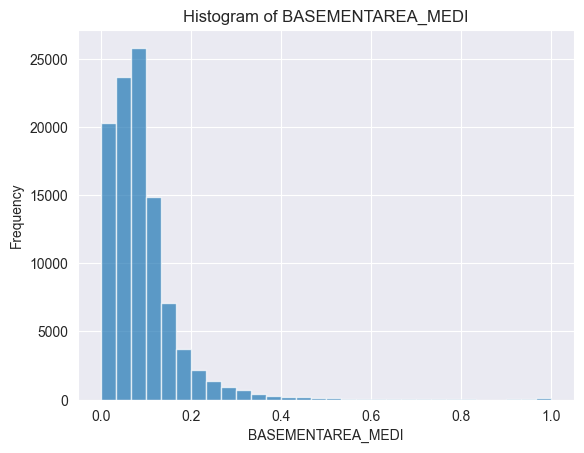

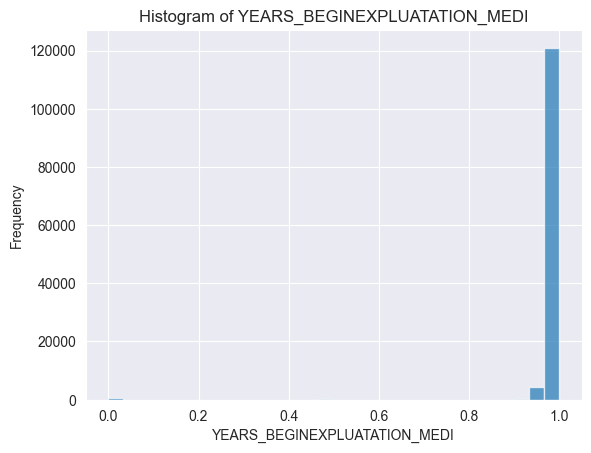

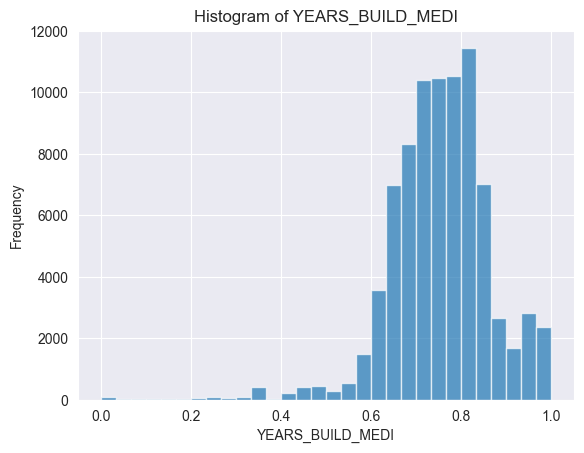

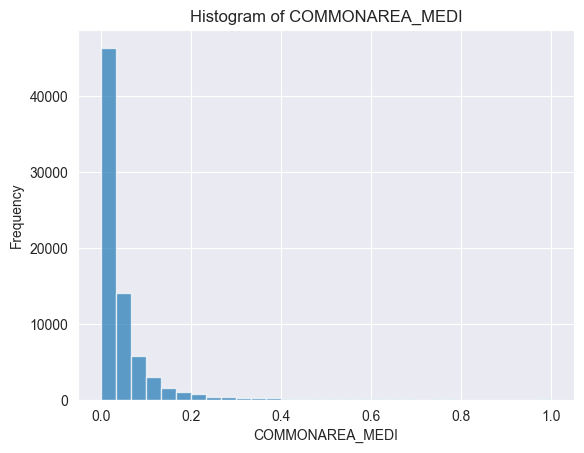

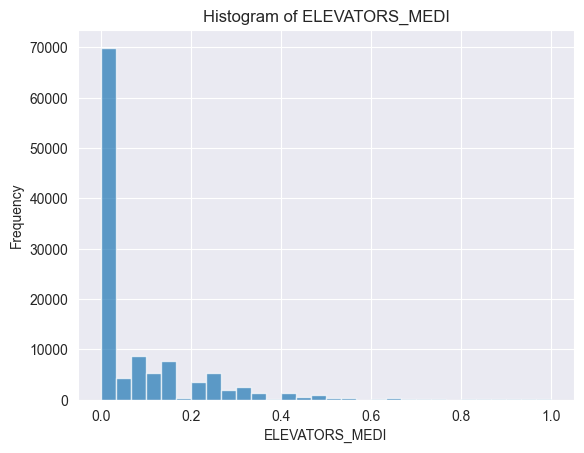

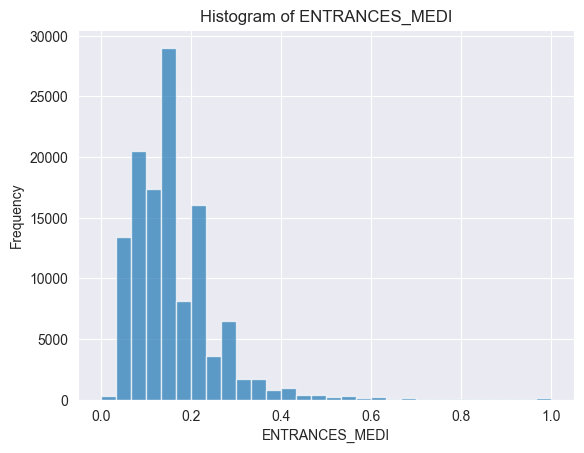

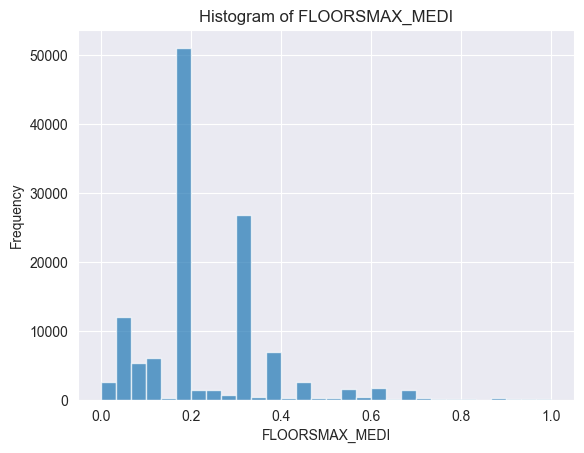

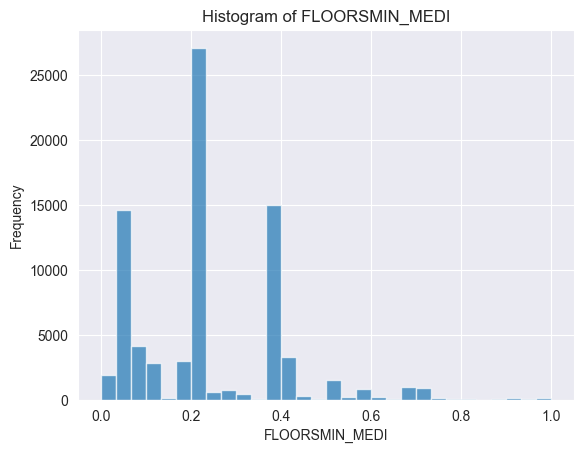

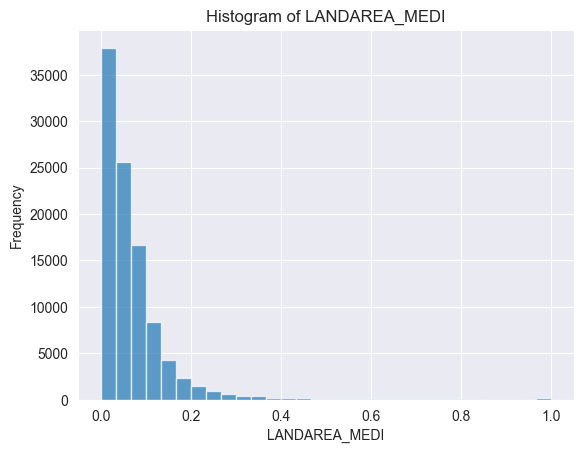

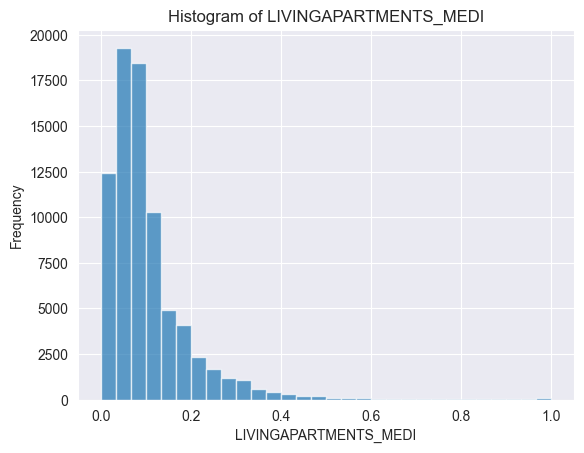

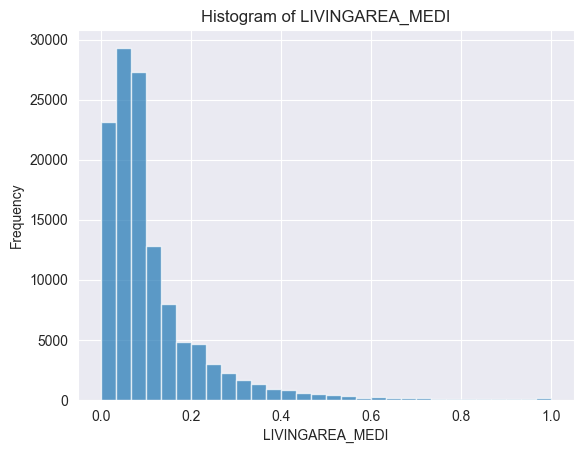

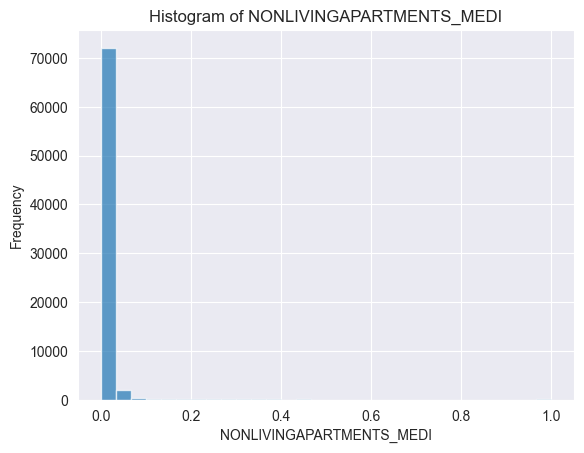

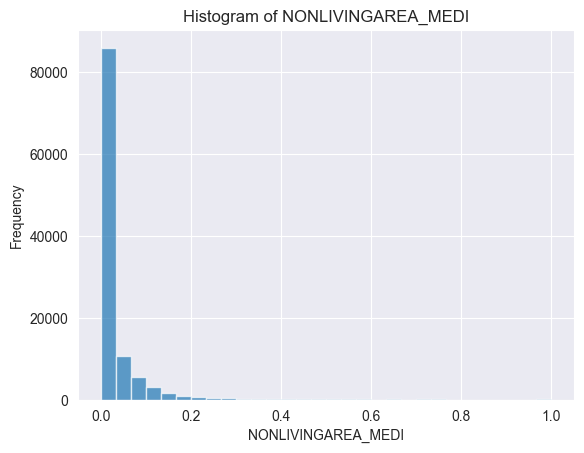

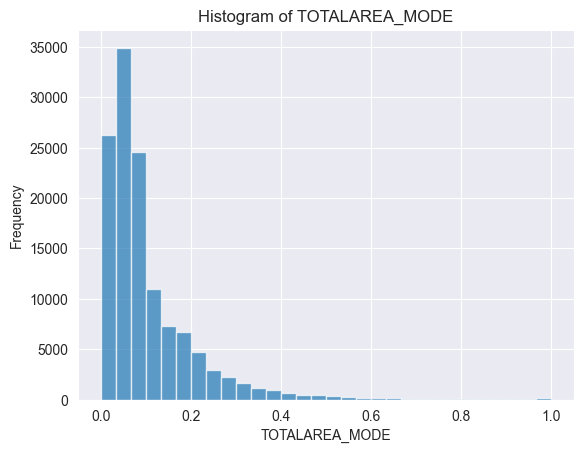

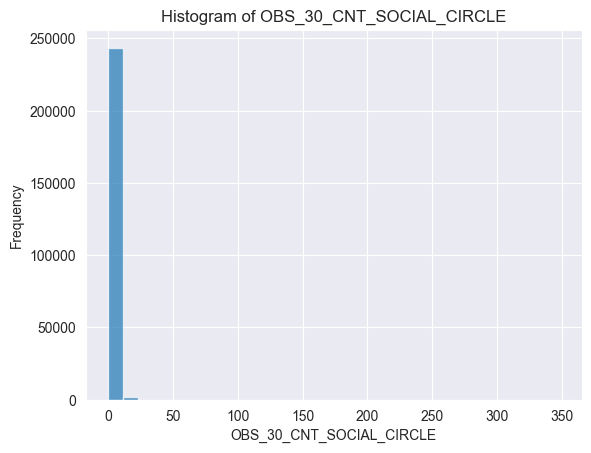

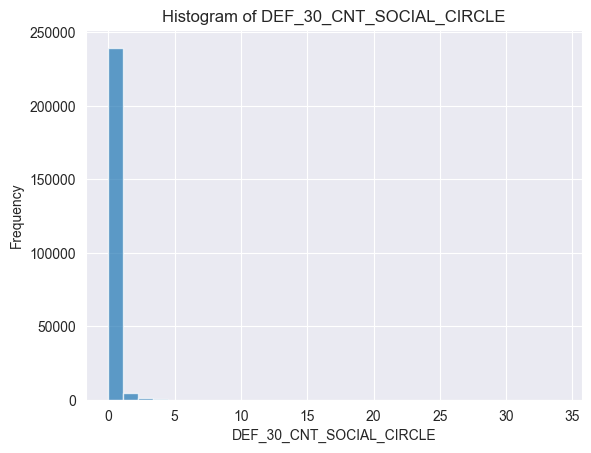

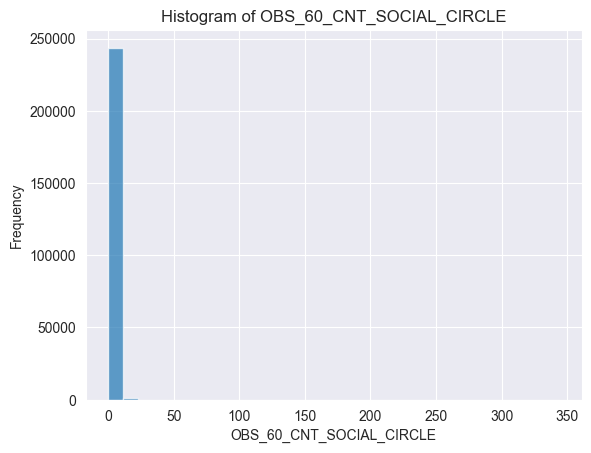

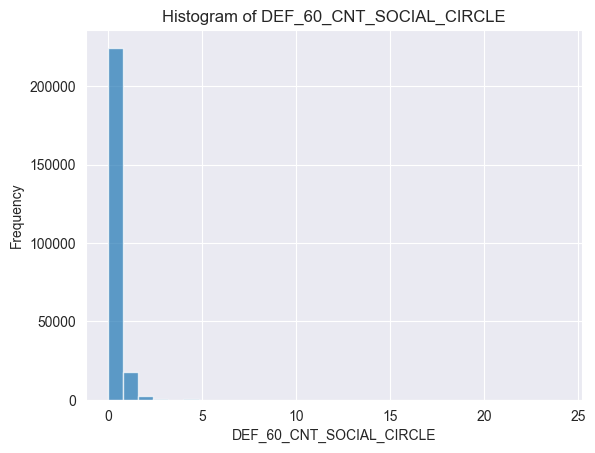

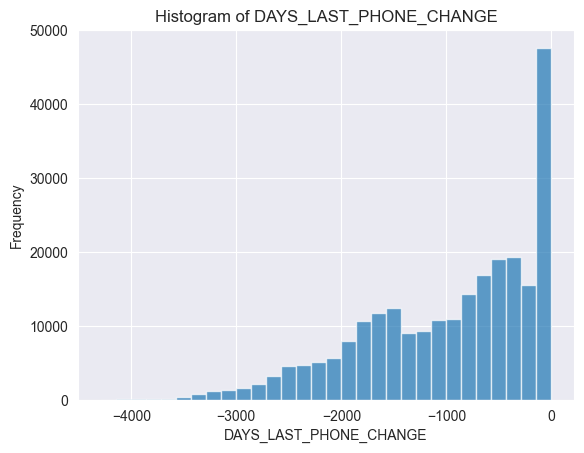

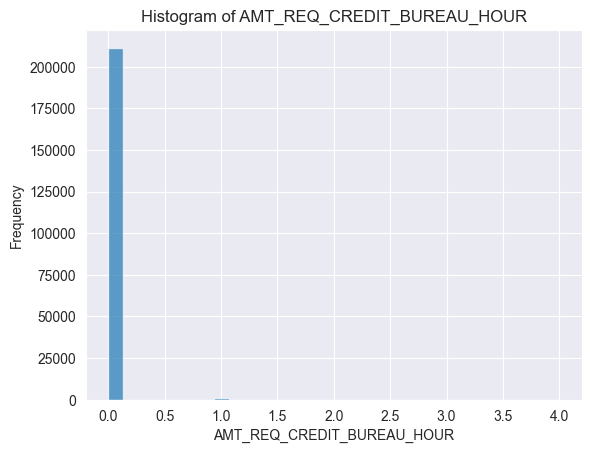

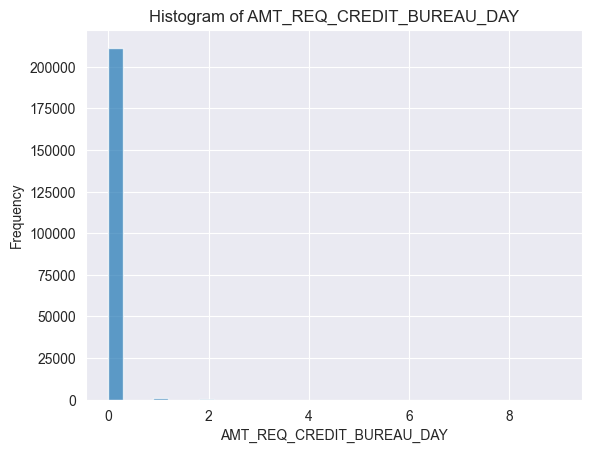

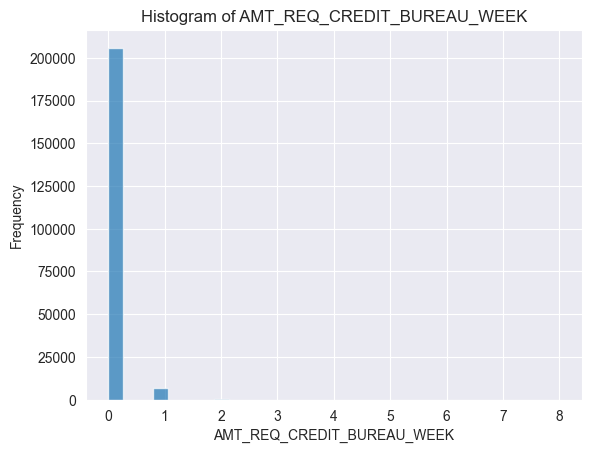

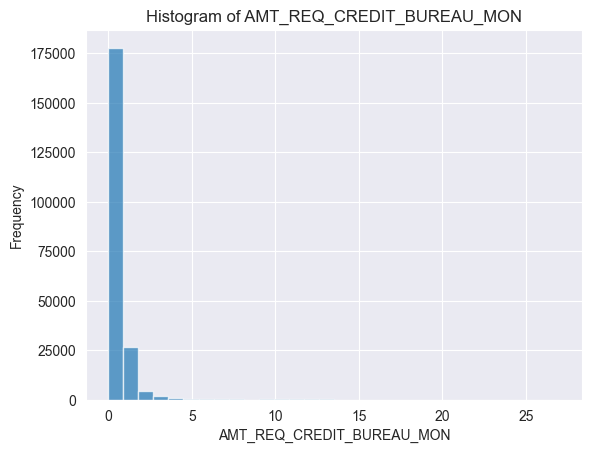

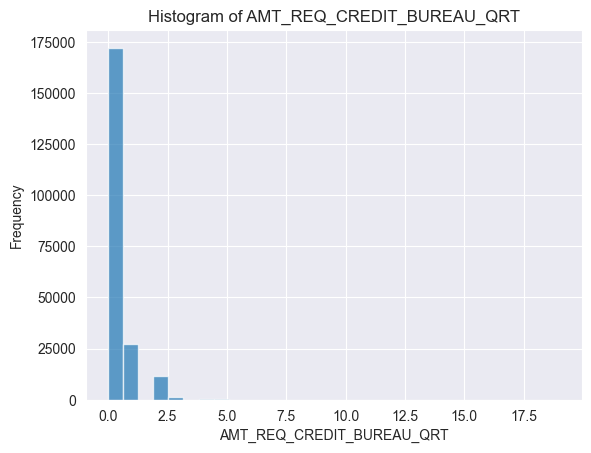

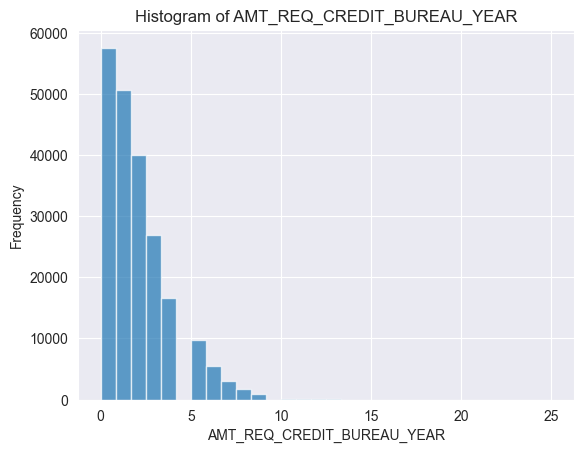

In [26]:
for col in numerical_columns:
    data_train[col].plot(kind='hist', bins=30, alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'title'

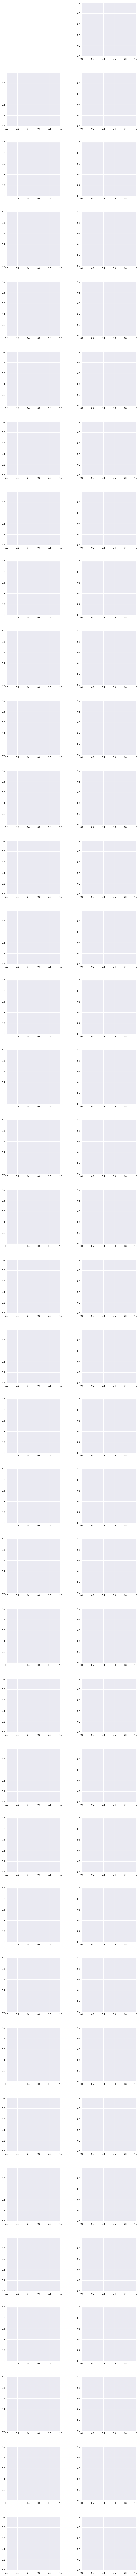

In [25]:
fig, axes = plt.subplots(nrows=37, ncols=2,
                         figsize=(10, 200))
fig.subplots_adjust(hspace=0.3, wspace=0.4)

axes_flatten = axes.flatten()

for i, col in enumerate(numerical_columns):
    if col != 'SK_ID_CURR':
        sns.histplot(x=col, data=data_train,
                        ax=axes_flatten[i], title=f"{col}_fig{i}")
        sns.despine(top=True, right=True, left=False, bottom=False)
    else:
        axes_flatten[i].axis('off')

fig.suptitle('Application - Numerical', fontsize=15)

plt.show()


Statistical inference:
1. Questions from missing values

# Improvements